In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv('../dataset/^NSEI-train.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-05-11,5189.750000,5206.700195,5126.500000,5136.149902,5136.149902,0
1,2010-05-12,5133.750000,5172.850098,5098.799805,5156.649902,5156.649902,0
2,2010-05-13,5157.549805,5212.700195,5147.950195,5178.899902,5178.899902,0
3,2010-05-14,5180.549805,5192.750000,5070.950195,5093.500000,5093.500000,0
4,2010-05-17,5093.899902,5094.549805,4966.250000,5059.899902,5059.899902,0


In [3]:
trainSet= df.iloc[:, 1:2].values

In [4]:
df.shape

(2443, 7)

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler(feature_range=(0,1))

In [6]:
trainingSetScaled= scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [7]:
xTRAIN = []
yTRAIN = []

for i in range(60, len(trainingSetScaled)):
    xTRAIN.append(trainingSetScaled[i-60:i, 0])
    yTRAIN.append(trainingSetScaled[i, 0])
    
xTRAIN, yTRAIN= np.array(xTRAIN), np.array(yTRAIN)

In [8]:
xTRAIN= np.reshape(xTRAIN, newshape=(xTRAIN.shape[0], xTRAIN.shape[1], 1))

In [9]:
trainingSetScaled.shape

(2443, 1)

In [10]:
xTRAIN.shape

(2383, 60, 1)

In [11]:
yTRAIN.shape

(2383,)

In [12]:
import tensorflow as tf
from tensorflow import keras

In [13]:
regressor= keras.models.Sequential([
    keras.layers.LSTM(units=64, return_sequences= True, input_shape= (xTRAIN.shape[1], 1)),
    keras.layers.Dropout(rate= 0.2),
    keras.layers.LSTM(units=50, return_sequences= True), 
    keras.layers.Dropout(rate= 0.2),
    keras.layers.LSTM(units=50), 
    keras.layers.Dropout(rate= 0.2),
    keras.layers.Dense(units= 1)
])

In [14]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            16896     
                                                                 
 dropout (Dropout)           (None, 60, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            23000     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [15]:
regressor.compile(optimizer= 'adam', loss= keras.losses.mean_squared_error)

In [16]:
regressor.fit(x= xTRAIN, y=yTRAIN, batch_size= 32, epochs= 100)

Epoch 1/100
75/75 [==============================] - 6s 21ms/step - loss: 0.0169
Epoch 2/100
75/75 [==============================] - 1s 19ms/step - loss: 0.0044
Epoch 3/100
75/75 [==============================] - 1s 19ms/step - loss: 0.0037
Epoch 4/100
75/75 [==============================] - 2s 26ms/step - loss: 0.0035
Epoch 5/100
75/75 [==============================] - 2s 22ms/step - loss: 0.0036
Epoch 6/100
75/75 [==============================] - 1s 20ms/step - loss: 0.0028
Epoch 7/100
75/75 [==============================] - 2s 24ms/step - loss: 0.0027
Epoch 8/100
75/75 [==============================] - 2s 22ms/step - loss: 0.0028
Epoch 9/100
75/75 [==============================] - 1s 18ms/step - loss: 0.0031
Epoch 10/100
75/75 [==============================] - 2s 25ms/step - loss: 0.0026
Epoch 11/100
75/75 [==============================] - 2s 25ms/step - loss: 0.0024
Epoch 12/100
75/75 [==============================] - 1s 20ms/step - loss: 0.0024
Epoch 13/100
75/75 [=====

In [17]:
prdctn= regressor.predict(xTRAIN)

75/75 [==============================] - 1s 8ms/step


In [83]:
regressor.save(f"../model/exports/itcStockPredLSTM(v2)/")

INFO:tensorflow:Assets written to: ../model/exports/itcStockPredLSTM(v2)/assets


INFO:tensorflow:Assets written to: ../model/exports/itcStockPredLSTM(v2)/assets


In [66]:
testDF= pd.read_csv('../dataset/ITC.NS-test.csv')
testDF

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-10,207.149994,207.449997,205.000000,205.550003,188.025925,16295368
1,2021-05-11,203.899994,206.500000,203.750000,204.000000,186.608047,13747541
2,2021-05-12,203.899994,205.250000,202.850006,203.250000,185.922012,16537612
3,2021-05-14,205.000000,213.199997,204.000000,212.250000,194.154709,61647120
4,2021-05-17,216.800003,217.000000,211.649994,212.600006,194.474869,38001828
...,...,...,...,...,...,...,...
489,2023-04-28,418.000000,428.250000,413.700012,425.549988,425.549988,12718721
490,2023-05-02,426.000000,427.000000,421.200012,424.450012,424.450012,10253527
491,2023-05-03,424.000000,428.500000,422.049988,427.149994,427.149994,7325483
492,2023-05-04,425.299988,427.000000,424.000000,424.600006,424.600006,7984933


In [81]:
realSP= testDF['Close'].values

In [68]:
dfTotal= pd.concat((df['Open'], testDF['Open']), axis=0)

In [69]:
modelInp= dfTotal[len(dfTotal)-len(testDF)-60:].values

In [70]:
modelInp= modelInp.reshape(-1,1)

In [71]:
modelInp= scaler.transform(modelInp)

In [72]:
xTEST= []

for i in range(60, len(modelInp)):
    xTEST.append(modelInp[i-60:i, 0])

xTEST= np.array(xTEST)

In [73]:
xTEST.shape

(494, 60)

In [74]:
xTEST= np.reshape(xTEST, newshape= (xTEST.shape[0], xTEST.shape[1], 1))

In [75]:
#pred = pred[..., 0]

In [76]:
pred.shape

(494, 1)

In [77]:
pred= regressor.predict(xTEST)

16/16 [==============================] - 0s 20ms/step


In [78]:
pred= scaler.inverse_transform(pred)

In [79]:
import matplotlib.pyplot as plt

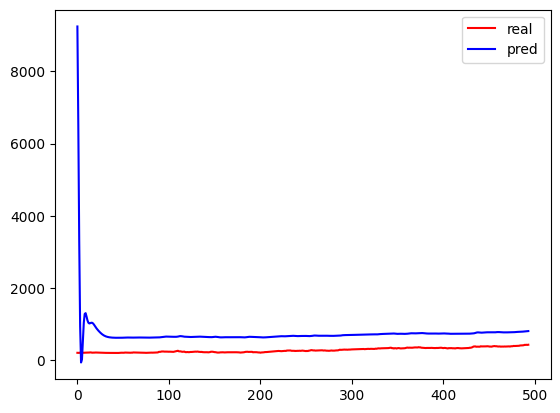

In [82]:
plt.plot(realSP, color= 'r', label= 'real')
plt.plot(pred, color= 'b', label= 'pred')
plt.legend()
plt.show()